<a href="https://colab.research.google.com/github/eneser12/PBAN801_24/blob/main/ForecastingBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
rm(list=ls())
df = read.csv("https://www.dropbox.com/s/3l9v0zsf03w35pp/EyeCell.csv?dl=1")
print(df)

   Year Sales
1  2007   290
2  2008   970
3  2009  1380
4  2010  2120
5  2011  3940
6  2012  6180
7  2013  7840
8  2014 10780
9  2015 16320
10 2016 20140
11 2017 31850
12 2018 36700
13 2019 38670
14 2020 44320
15 2021 46410
16 2022 51230


In [ ]:
str(df)

'data.frame':	16 obs. of  2 variables:
 $ Year : int  2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 ...
 $ Sales: int  290 970 1380 2120 3940 6180 7840 10780 16320 20140 ...


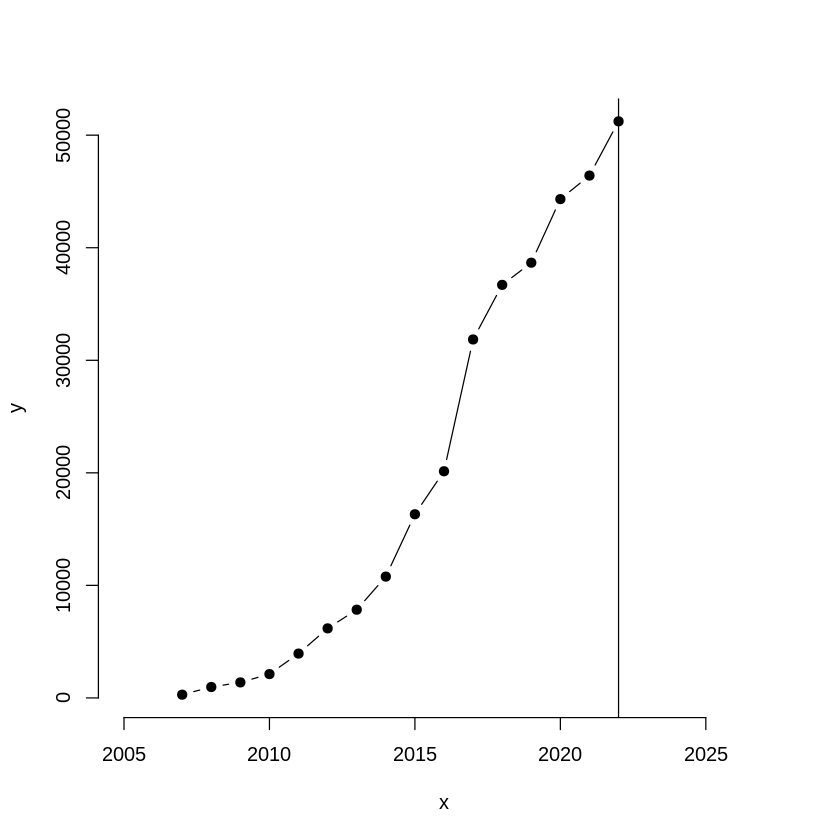

In [ ]:
# Create a first line
plot(df$Year, df$Sales, type = "b", frame = FALSE, pch = 19,
     col = "black", xlab = "x", ylab = "y", xlim=c(2005,2027))
abline(v=2022)


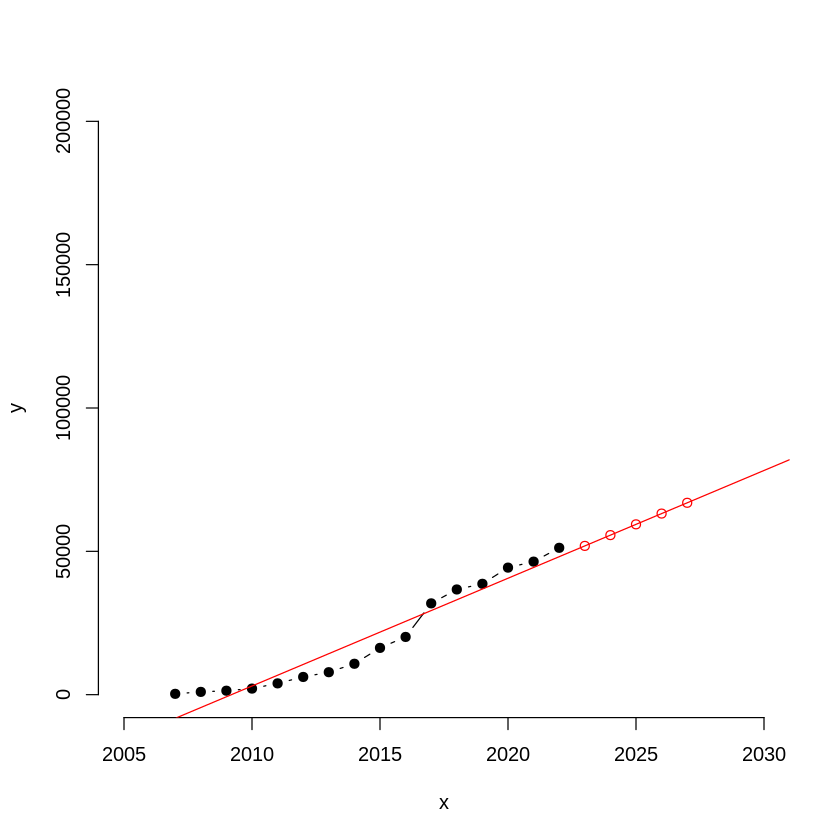

In [ ]:
newYears = data.frame(Year = 2023:2027)
fLinus = predict(mLinus, newdata = newYears)

plot(df$Year, df$Sales, type = "b", frame = FALSE, pch = 19,
     col = "black", xlab = "x", ylab = "y", xlim=c(2005,2030), ylim=c(0,200000))
abline(mLinus, col="red")
points(x=2023:2027, y=fLinus, col="red")

Que’s forecast:
Que suggests a simple, quick & dirty way to forecast. His suggestion is (i) compute the difference between each consequtive time period. Then, simply take the average for the last 5 years and and use this quantity to extrapolate further. Say, if the 5-year-average is 1K the 2023 forecast will be (2022 sales + 1K). Note that, we won’t compute a comparable Adj-R^2 for Que’s forecast.

[1]   680   410   740  1820  2240  1660  2940  5540  3820 11710  4850  1970
[13]  5650  2090  4820

[1] 15

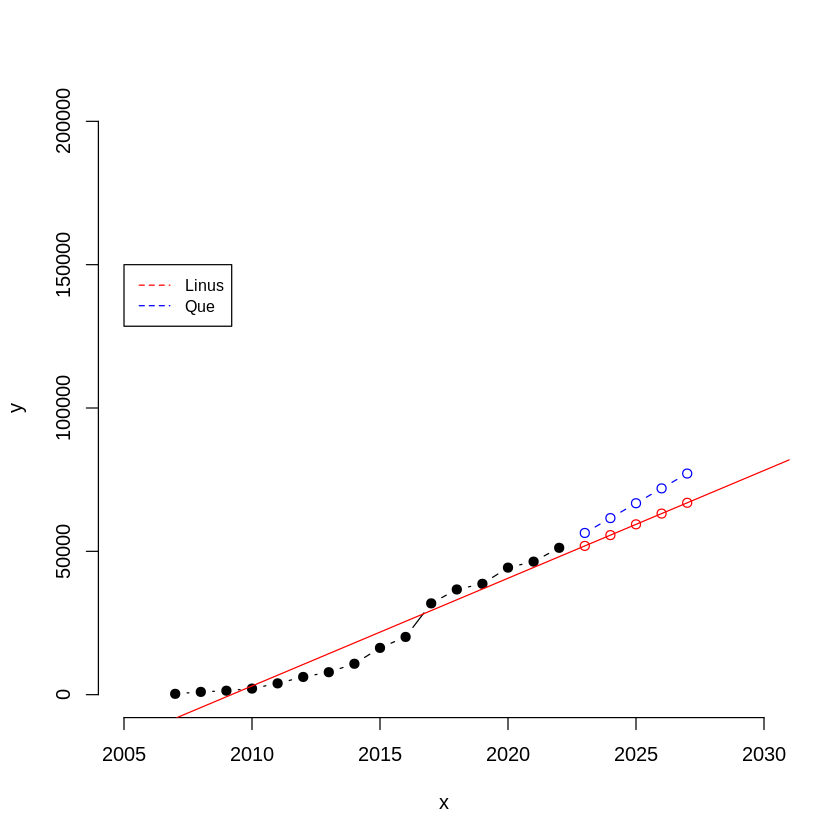

In [ ]:
# average them
diff(df$Sales)
length(diff(df$Sales))
avDiff = mean(diff(df$Sales)[10:15])
# extrapolate
fQue=c()
for (i in 1:5){
  fQue[i] =  df$Sales[nrow(df)]+avDiff*i
}
# plot along with Linus's forecast:
plot(df$Year, df$Sales, type = "b", frame = FALSE, pch = 19,
     col = "black", xlab = "x", ylab = "y", xlim=c(2005,2030), ylim=c(0,200000))
abline(mLinus, col="red")
points(x=2023:2027, y=fLinus, col="red")
# add Que's forecast
points(x=2023:2027, y=fQue, col="blue", type="b")
# add legend
legend(2005, 150000, legend=c("Linus","Que"),
       col=c("red", "blue"), lty=c(2,2), cex=0.8)

Powering’s forecast:
Realizing the power shape of the demand pattern, Powering speculates using a power function in the form of y=axb for the task. Taking the log of both sides we form the regression as follows: log(y)=log(a)+b.log(x) . Such models are called log-log regression models. Powering’s forecast yields an adjusted R^2 value of 0.92. The model has the form: log(y)=-4934.07 + 649.73log(x).

In [ ]:
# Powering's forecast: in the form of ax^b
mPow = lm(log(Sales) ~ log(Year), data=df)
summary(mPow)$adj.r.squared

summary(mPow)

[1] 0.9207212


Call:
lm(formula = log(Sales) ~ log(Year), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0357 -0.1643  0.1188  0.3187  0.4339 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4934.07     373.45  -13.21 2.69e-09 ***
log(Year)     649.73      49.09   13.24 2.63e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4493 on 14 degrees of freedom
Multiple R-squared:  0.926,	Adjusted R-squared:  0.9207 
F-statistic: 175.2 on 1 and 14 DF,  p-value: 2.63e-09


Using some computation Powering’s forecast is computed and plotted as:



[1]   290   970  1380  2120  3940  6180  7840 10780 16320 20140 31850 36700
[13] 38670 44320 46410 51230

[1] 0.903844

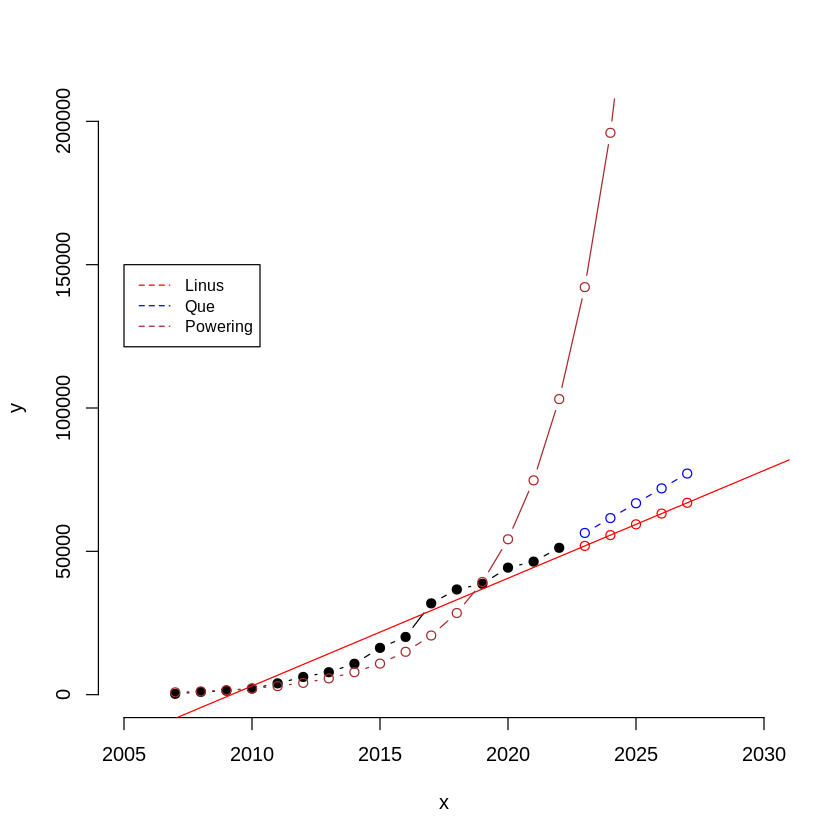

In [ ]:
newYears = data.frame(Year = 2023:2027)
fPow=exp(predict(mPow, newdata = data.frame(Year=2007:2027)))
df$Sales
cor(fPow[1:16], df$Sales)

# plot along with Linus's forecast:
plot(df$Year, df$Sales, type = "b", frame = FALSE, pch = 19,
     col = "black", xlab = "x", ylab = "y", xlim=c(2005,2030), ylim=c(0,200000))
abline(mLinus, col="red")
points(x=2023:2027, y=fLinus, col="red")
# add Que's forecast
points(x=2023:2027, y=fQue, col="blue", type="b")
# add Powering's forecast
points(x=2007:2027, y=fPow, col="brown", type="b")
# add legend
legend(2005, 150000, legend=c("Linus","Que", "Powering"),
       col=c("red", "blue", "brown"), lty=c(2,2,2), cex=0.8)


Polyaltan’s forecast:
Polyaltan suggests increasing the complexity of the linear model to increase the model fit. Indeed the Adjusted R^2 is now 0.97

[1] 0.9740662

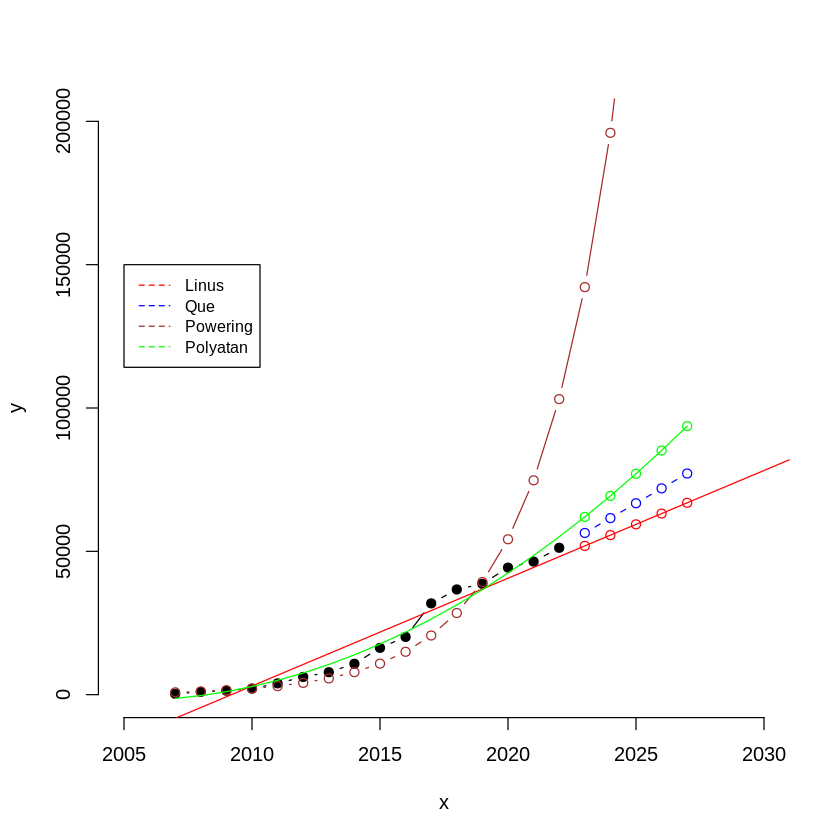

In [ ]:
mPoly = lm(Sales ~ Year + I(Year^2), data=df)
summary(mPoly)$adj.r.squared

fPoly = predict(mPoly, newdata = newYears)


# plot along with Linus's forecast:
plot(df$Year, df$Sales, type = "b", frame = FALSE, pch = 19,
     col = "black", xlab = "x", ylab = "y", xlim=c(2005,2030), ylim=c(0,200000))
abline(mLinus, col="red")
points(x=2023:2027, y=fLinus, col="red")
# add Que's forecast
points(x=2023:2027, y=fQue, col="blue", type="b")
# add Powering's forecast
points(x=2007:2027, y=fPow, col="brown", type="b")
# adding Polyaltan's forecast
lines(x=c(df$Year, 2023:2027), y=c(predict(mPoly, newdata=df), fPoly), col="green")
points(x=2023:2027, y=fPoly, col="green")
# add legend
legend(2005, 150000, legend=c("Linus","Que", "Powering", "Polyatan"),
       col=c("red", "blue", "brown", "green"), lty=c(2,2,2,2), cex=0.8)

BASS Diffusion Model
Bass model, due to Frank Bass (1960s) is made up of a simple differential equation that explains how new products get adopted. The model rationalizes how existing and future users of a new product interact. The model’s primary concept is that adopters may be categorized as innovators or imitators, and the pace and timing of adoption is determined by the degree of innovation and imitation among adopters. To be able to compute a BASS curve, expert opinion on the market size is needed. In our case, subject matter experts suggested 150K as the realistic market size.

Bass, F. M. (1969). A new product growth for model consumer durables. Management science, 15(5), 215-227.

In the following, a simple illustration of bass diffusions of two products are given.

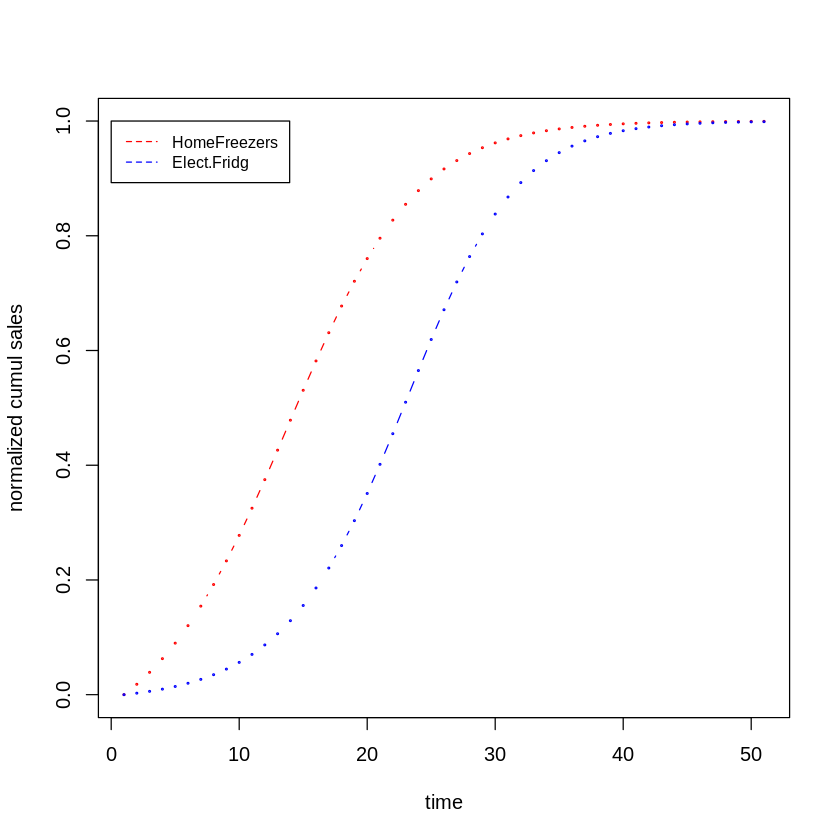

In [ ]:
# coeffs from:
# Bass, F. M. (1969). A new product growth for model consumer durables. Management science, 15(5), 215-227.

UfunBass = function(t,p,q,M) {
  Y = NULL
  N = NULL
  N[1]=0
  yh=NULL
  Y[1] = 0
  innoAdapt = c()
  imitAdapt = c()
  for (i in 1:t){
    innoAdapt[i] = p*(M-N[i])
    imitAdapt[i] = q*(N[i]/M)*(M-N[i])
    yh[i]= innoAdapt[i] + imitAdapt[i]
    Y[i+1]=yh[i]+Y[i]
    N[i+1] = N[i]+yh[i]
  }
  return(list(Y, innoAdapt, imitAdapt))
}

phf=.018119; qhf=.17110    # home freezer
pef=.0026167; qef= .21566 # Electric Fridge
M=1
t=50
reshf = UfunBass(t,phf,qhf,M)
resef = UfunBass(t,pef,qef,M)
plot(reshf[[1]], type="b", cex=.2, col="red",
     xlab="time", ylab="normalized cumul sales")
points(x=1:(t+1), y=resef[[1]], type="b",
       col="blue", cex=.2)
legend(0, 1, legend=c("HomeFreezers","Elect.Fridg"),
       col=c("red", "blue"), lty=c(2,2), cex=0.8)

In [ ]:
install.packages("nloptr")
install.packages("diffusion")
library(nloptr)
library(diffusion)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
M=1000000
# t=length(2007:2027)
UfunBass = function(t,p,q,M) {
  Y = NULL
  N = NULL
  N[1]=0
  yh=NULL
  Y[1] = 0
  innoAdapt = c()
  imitAdapt = c()
  for (i in 1:length(t)){
    innoAdapt[i] = p*(M-N[i])
    imitAdapt[i] = q*(N[i]/M)*(M-N[i])
    yh[i]= innoAdapt[i] + imitAdapt[i]
    Y[i+1]=yh[i]+Y[i]
    N[i+1] = N[i]+yh[i]
  }
  return(list(Y[-1], innoAdapt[-1], imitAdapt[-1]))
}

# params= startB
bassErr = function(params){
  p=params[1]
  q=params[2]
  M=params[3]
  y = cumsum(df$Sales)/M
  hata=sum((y-UfunBass(y, p, q,1)[[1]])^2)
  return(hata)
}


getBass = function(y){
  upperB = c(p=.3, q=.3,M)
  lowerB = c(p=0, q=0.001,M)
  startB = c(p=.01, q=0.1,M)
  advNeldMead = mlsl(x0=startB, bassErr, lower=lowerB, upper=upperB, nl.info=TRUE,
                     control=list(xtol_rel=1e-8, maxeval=10000))
  bassRes = UfunBass(y, advNeldMead$par[1],advNeldMead$par[2],advNeldMead$par[3])[[1]]
  bassL = list("params"= advNeldMead$par, "yhat"=bassRes)
  return(bassL)
}



Call:
nloptr(x0 = x0, eval_f = fn, eval_grad_f = gr, lb = lower, ub = upper, 
    opts = opts)


Minimization using NLopt version 2.7.1 

NLopt solver status: 5 ( NLOPT_MAXEVAL_REACHED: Optimization stopped because 
maxeval (above) was reached. )

Number of Iterations....: 10000 
Termination conditions:  stopval: -Inf	xtol_rel: 1e-08	maxeval: 10000	ftol_rel: 0	ftol_abs: 0 
Number of inequality constraints:  0 
Number of equality constraints:    0 
Current value of objective function:  0.000985303803636222 
Current value of controls: 0.001984706 0.2988398 1e+06




[1] 0.9591447

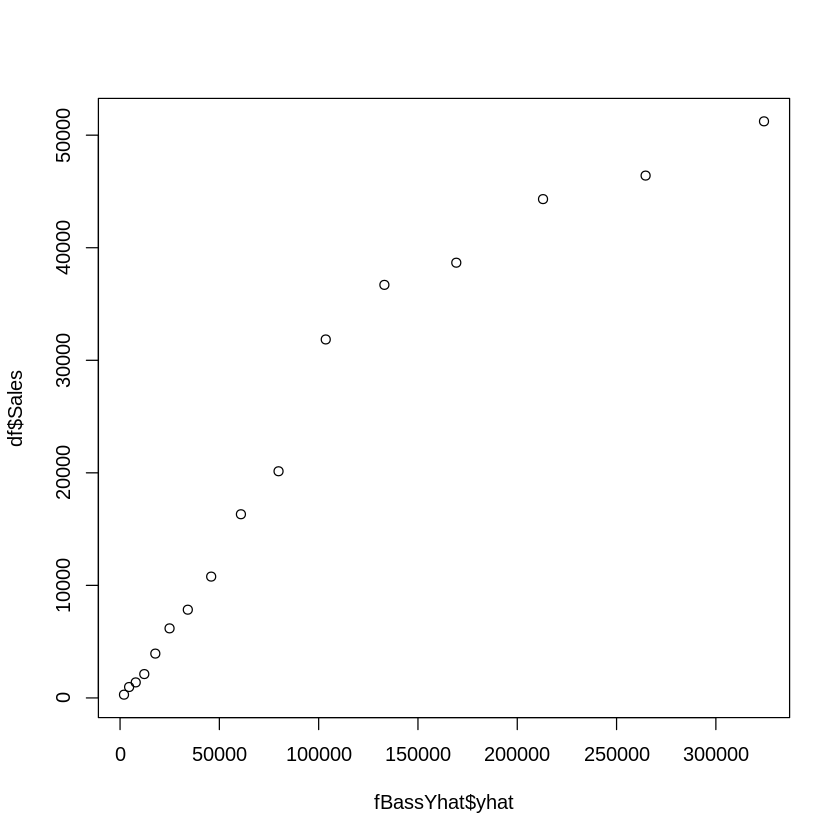

In [ ]:
x=1:16
fBassYhat = getBass(x)
plot(fBassYhat$yhat, df$Sales)
# SSR = sum((fBassYhat$yhat - df$Sales)^2)
# SST = sum(df$Sales^2)
# R2 = 1-SSR/SST
cor(fBassYhat$yhat, df$Sales)
parBass = fBassYhat$params

The Bass model achieves strong fit. R^2=0.96. Then, lets plot all our predictions together, along with bass diffusion model's:

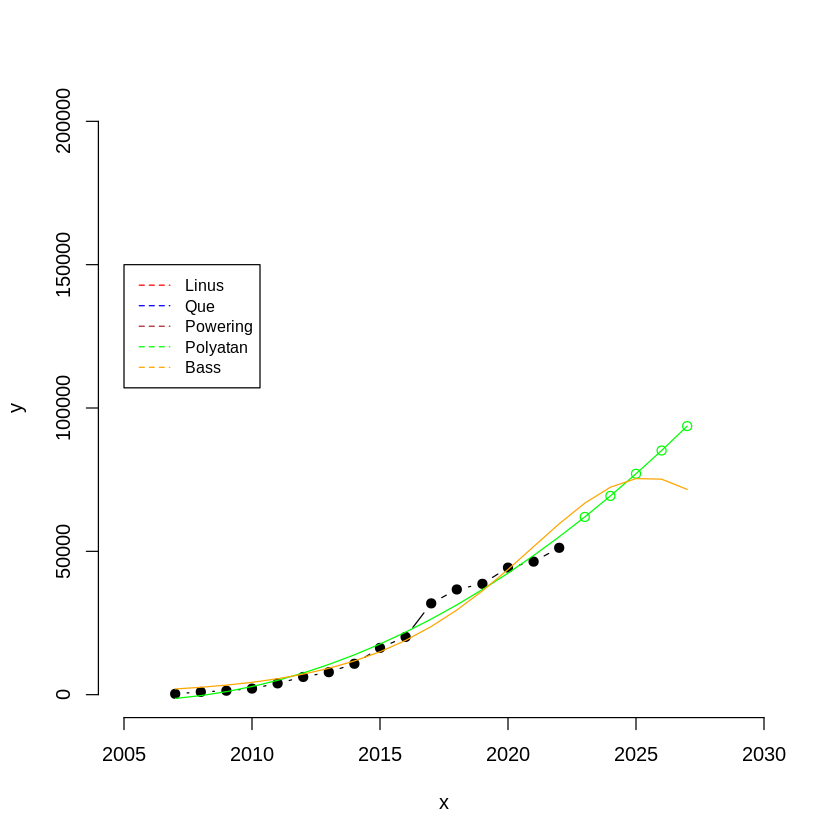

In [ ]:
fBassCum = UfunBass(1:21, fBassYhat$params[1], fBassYhat$params[2], fBassYhat$params[3])[[1]]
fBass = c(fBassCum[1], diff(fBassCum))

# plot along with Linus's forecast:
plot(df$Year, df$Sales, type = "b", frame = FALSE, pch = 19,
     col = "black", xlab = "x", ylab = "y", xlim=c(2005,2030), ylim=c(0,200000))
# abline(mLinus, col="red")
# points(x=2023:2027, y=fLinus, col="red")
# add Que's forecast
# points(x=2023:2027, y=fQue, col="blue", type="b")
# add Powering's forecast
# points(x=2007:2027, y=fPow, col="brown", type="b")
# adding Polyaltan's forecast
lines(x=c(df$Year, 2023:2027), y=c(predict(mPoly, newdata=df), fPoly), col="green")
points(x=2023:2027, y=fPoly, col="green")
# add forecas according to Bass diffusion model
points(x=2007:2027, y=fBass, col="orange", pch=3, type="l")

# add legend
legend(2005, 150000, legend=c("Linus","Que", "Powering", "Polyatan", "Bass"),
       col=c("red", "blue", "brown", "green","orange"), lty=c(2,2,2,2,2), cex=0.8)


In [1]:
print("Hello")

[1] "Hello"
